# Cours ML avec Python — Niveau débutant

## Objectif de cette première leçon

À la fin de cette leçon, je saurai charger un jeu de données, le découper en apprentissage et test, construire un pipeline scikit-learn, entraîner un modèle simple de classification et un modèle simple de régression, puis évaluer correctement leurs performances.

## Les idées de base à comprendre avant de coder

Le machine learning apprend des relations à partir de données plutôt que d’être programmé explicitement. On parle d’apprentissage supervisé lorsque l’on dispose d’exemples avec la réponse attendue. **La classification prédit une catégorie comme espèce de fleur, maladie présente ou absente, type de client**. **La régression prédit une quantité comme un prix, une production, un rendement**. On évalue un modèle sur des exemples jamais vus pendant l’entraînement pour mesurer sa capacité à généraliser: c'est la *robustesse*. On sépare donc les données en deux parties nommées apprentissage et test. Pour éviter les erreurs humaines et les fuites d’information, on encapsule tout le prétraitement et le modèle dans un pipeline scikit-learn qui applique toujours les mêmes étapes dans le bon ordre.

## Premier modèle de classification avec scikit-learn

Nous allons prédire l’espèce d’une fleur à partir de mesures simples du célèbre jeu Iris. La variable cible est donc catégorielle

Le score de précision est : 0.933

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



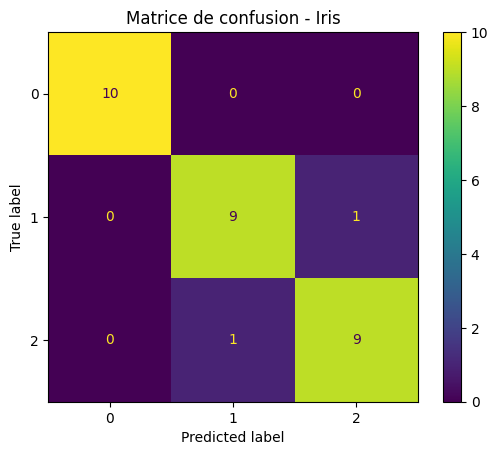

In [2]:
# Importer les librairies
import sklearn 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 1. Charger les données
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# 2. Découpage apprentissage et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 3. Pipeline: standardisation puis modèle
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000)
)

# 4. Entraînement
clf.fit(X_train, y_train)

# 5. Evaluation
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Le score de précision est : {acc:.3f}\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 6. Matrix de confusion
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Matrice de confusion - Iris")
plt.show()


**Analyse**

Précision globale : 93.3%
Le modèle classifie correctement 28 fleurs sur 30 dans l'ensemble de test.

Performance par classe :
Setosa : 100% de précision (10/10 corrects)
Versicolor : 90% de précision (9/10 corrects)
Virginica : 90% de précision (9/10 corrects)

Le modèle parfait pour distinguer les setosas
Légère confusion (1 erreur) entre versicolor et virginica

Le modèle est donc efficace pour classifier les espèces d'iris, avec juste une légère difficulté à distinguer les deux espèces les plus similaires (versicolor et virginica).

## Premier modèle de régression avec scikit-learn

Nous allons prédire une mesure continue de santé liée au diabète à partir de dix variables.
**Attention: La variable cible n'est pas une variable du tableau. C'est le résultat qu'on veut prédire à partir des mesures initiales. Elle n'apparaît pas dans le tableau des données explicatives**
Même principe: découpage, pipeline et évaluation mais cette fois avec des métriques adaptées à la régression comme l’erreur absolue moyenne, la racine de l’erreur quadratique moyenne et le coefficient de détermination.

La variable cible peut-être:
**- Variable cible EXTERNE** (comme dans diabetes)
La cible est mesurée ultérieurement
Exemple : prédire des résultats futurs

**- Variable cible INTERNE** (choisie parmi les features)
On sélectionne une colonne existante comme cible

Très utile pour :
Imputation : prédire des valeurs manquantes
Feature importance : comprendre quelles variables expliquent le mieux une autre

In [10]:
# Importer les libriaries
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# 1. Chargement des données
diab = load_diabetes(as_frame=True)
X2 = diab.data
y2 = diab.target

"""# Aperçu des premières lignes
print("=== PREMIÈRES LIGNES ===")
print(diab.frame.head())

print("=== STATISTIQUES DE LA VARIABLE CIBLE ===")
print(f"Valeurs min : {y2.min()}")
print(f"Valeurs max : {y2.max()}")
print(f"Moyenne : {y2.mean():.2f}")
print(f"Médiane : {y2.median():.2f}")
print(f"Écart-type : {y2.std():.2f}")

print("\n=== QUELQUES VALEURS EXEMPLES ===")
print(y2.head(10))"""

# 2. Découpage apprentissage et test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

# 3. Pipeline : standardisation puis modèle
reg = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

# 4. Entrainement
reg.fit(X2_train, y2_train)

# 5. Evaluation
y2_pred = reg.predict(X2_test)
mae = mean_absolute_error(y2_test, y2_pred)
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2 = r2_score(y2_test, y2_pred)
mape = mean_absolute_percentage_error(y2_test, y2_pred)

print(f'rmse : {rmse : .3f}\n')
print(f'r2 : {r2 : .3f}\n')
print(f'mape : {mape : .3f}\n')

rmse :  53.777

r2 :  0.454

mape :  0.374



Analyse des résultats :

RMSE = 53.777 : L'erreur quadratique moyenne est d'environ 54 unités
R² = 0.454 : Le modèle explique 45.4% de la variance des données
MAPE = 0.374 : L'erreur moyenne en pourcentage est de 37.4%

Interprétation :
Les performances sont correctes pour un modèle de base. Le R² de 0.454 signifie que près de la moitié de la variabilité de la variable cible est expliquée par le modèle. Le MAPE de 37.4% indique que les prédictions ont en moyenne une erreur de 37% par rapport aux valeurs réelles.

## Random forest (forêt aléatoire)

C'est aussi du Machine Learning ! Les Random Forests (Forêts Aléatoires) sont un algorithme d'apprentissage supervisé très populaire.

En simple :
C'est une collection d'arbres de décision qui travaillent ensemble
Chaque arbre vote pour une prédiction
La décision finale est la moyenne (régression) ou le vote majoritaire (classification) de tous les arbres

In [12]:
from sklearn.ensemble import RandomForestRegressor

print("\n" + "="*50)
print("RANDOM FOREST")
print("="*50)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X2_train, y2_train)
y_pred_rf = rf_model.predict(X2_test)

rmse_rf = np.sqrt(mean_squared_error(y2_test, y_pred_rf))
r2_rf = r2_score(y2_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y2_test, y_pred_rf)
mae_rf = mean_absolute_error(y2_test, y_pred_rf)

print(f'RMSE : {rmse_rf : .2f}')
print(f'R² : {r2_rf : .2f}')
print(f'MAPE : {mape_rf}')
print(f'MAE : {mae_rf : .2f}')


RANDOM FOREST
RMSE :  54.33
R² :  0.44
MAPE : 0.4000528510559908
MAE :  44.05


**Pas d'algorithme "meilleur" dans l'absolu - ça dépend des données !**

Relations linéaires → Régression linéaire/Ridge souvent suffisant

Relations complexes (non-linéaire) → Random Forest excelle

Petits datasets → Les algos simples marchent souvent mieux